In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


https://www.kaggle.com/code/adhamtarek147/most-streamed-spotify-songs-2023/notebook

In [24]:
df = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [25]:
#combine the columns into a single 'release_date' column
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                                    df['released_month'].astype(str) + '-' +
                                    df['released_day'].astype(str))

#drop the original year, month, and day columns
df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [26]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [27]:
df.drop(columns=['bpm', 'key', 'mode'], inplace=True)
# df.columns

In [28]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,65,23,80,14,63,11,6,2023-05-18


In [29]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'release_date'],
      dtype='object')

In [30]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

In [31]:
#the dataset after dropping the columns
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'release_date'],
      dtype='object')

In [32]:
#check if there are any duplicated rows
df.duplicated().sum()

0

In [33]:
#check for duplicates in the 'track_name' column
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,66,24,58,17,0,19,5,1982-05-16


In [36]:
df['streams'] = pd.to_numeric(df['streams']) 

In [35]:
#drop the row that has this weird value that causes above error
df = df.drop([574])
# df.drop([574])

In [37]:
df['streams'] = pd.to_numeric(df['streams'])

In [38]:
df = df.sort_values(by = 'streams', ascending=False)
df = df.drop_duplicates(subset = 'track_name', keep = 'first')


In [39]:
df = df.drop_duplicates(subset = 'track_name', keep = 'first')

In [40]:
#check for duplicates in the 'track_name' column
df[df['track_name'].duplicated()]


,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


I don't want to provide false data and at the same time I don't want to drop rows that has nulls because If I did this the other information about the tracks will be dropped too so I decided to drop this column

In [ ]:
#dropping 'in_shazam_charts' column
df.drop(columns = ['in_shazam_charts'], inplace = True)

In [ ]:
# spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists']) => this will result an error due to a comma in a number 

#remove commas from 'in_shazam_charts' column due to the above error
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')




In [43]:
#convert 'in_shazam_charts' column to numeric
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

In [45]:
#datatypes of the columns after solving the the datatype problem
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
release_date            datetime64[ns]
dtype: object

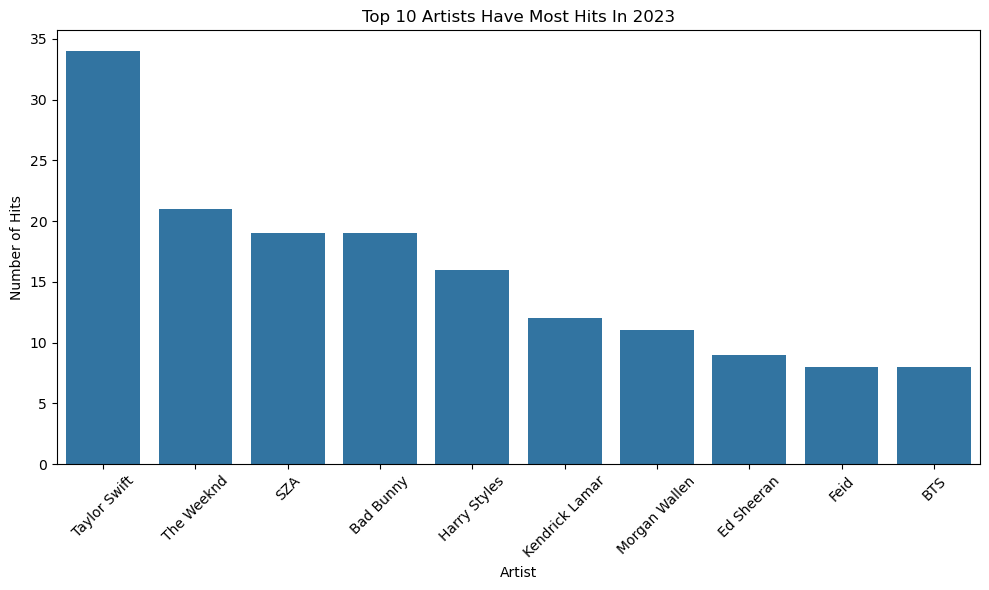

In [46]:
#count the number of songs released by each artist
artist_counts = df['artist(s)_name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

#--------------------------------------------
plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

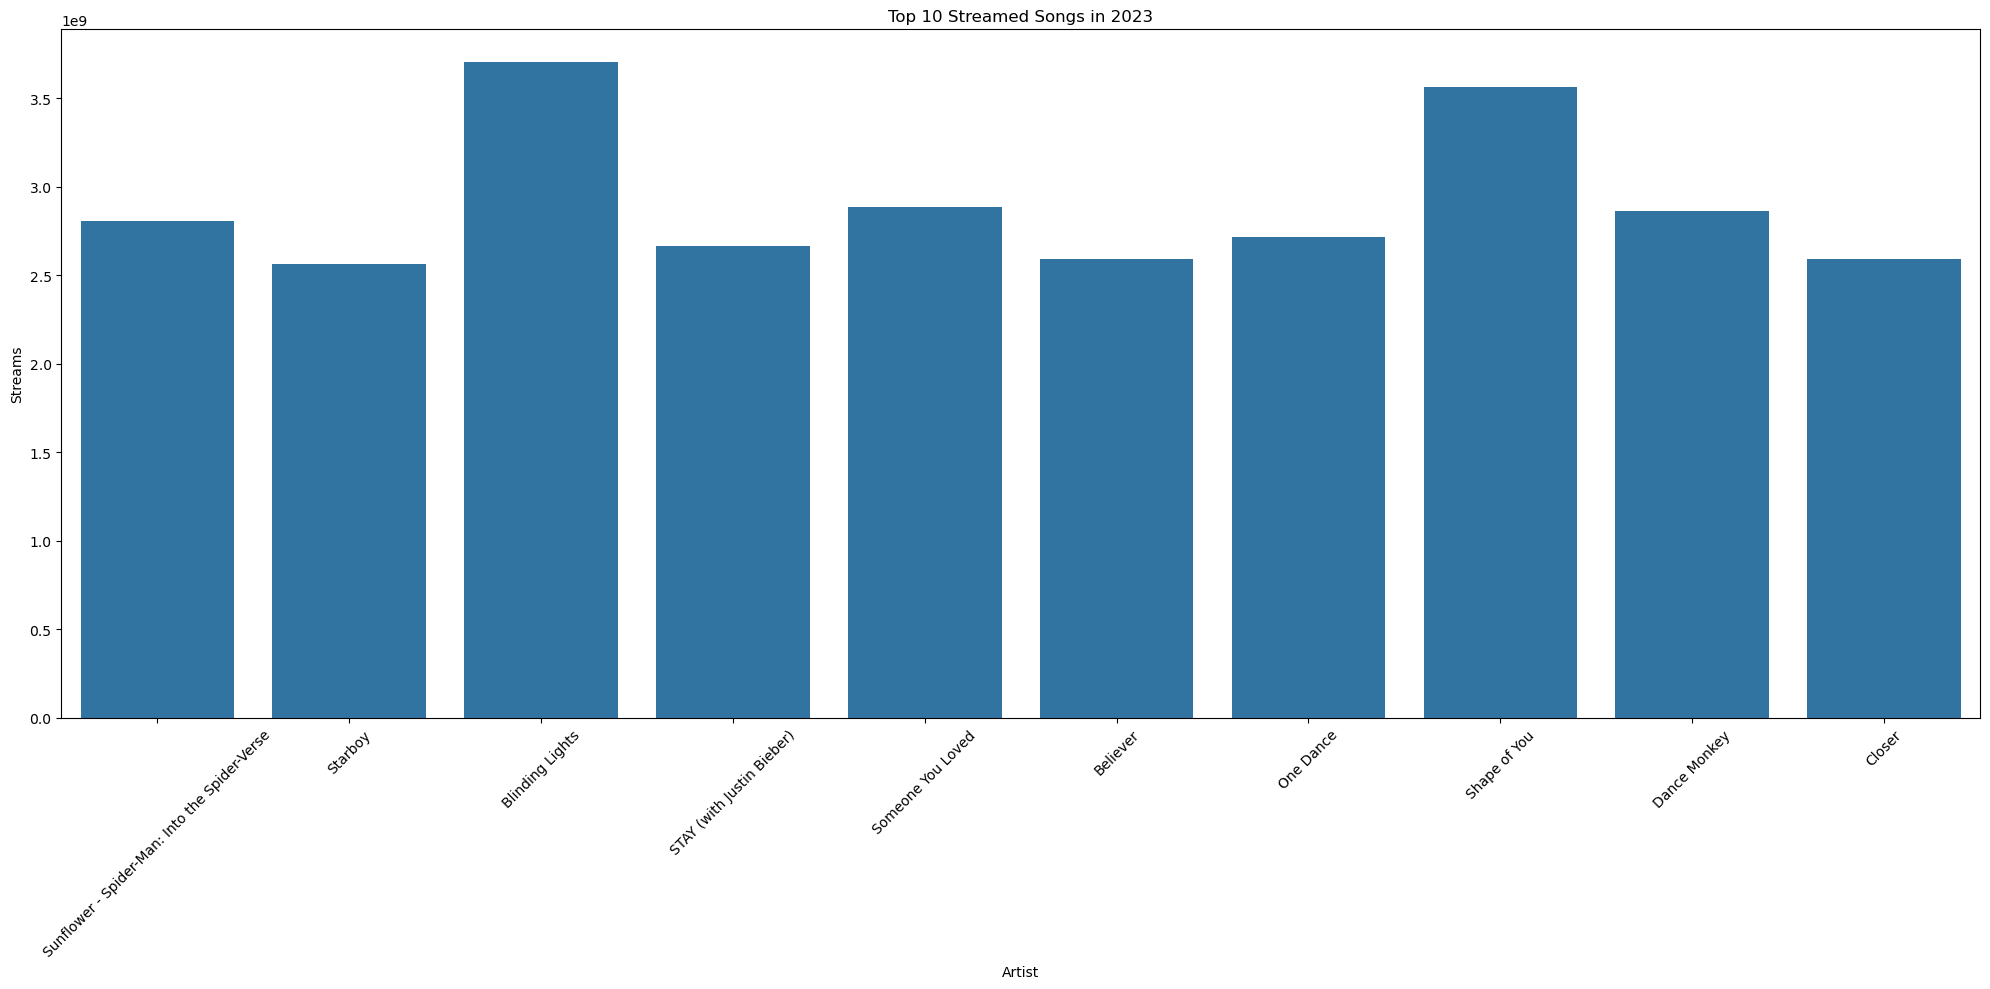

In [47]:
#the barplot represents Top 10 Streamed Songs in 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = df.track_name[:10], y = df.streams)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Relationship Between All Audio Features

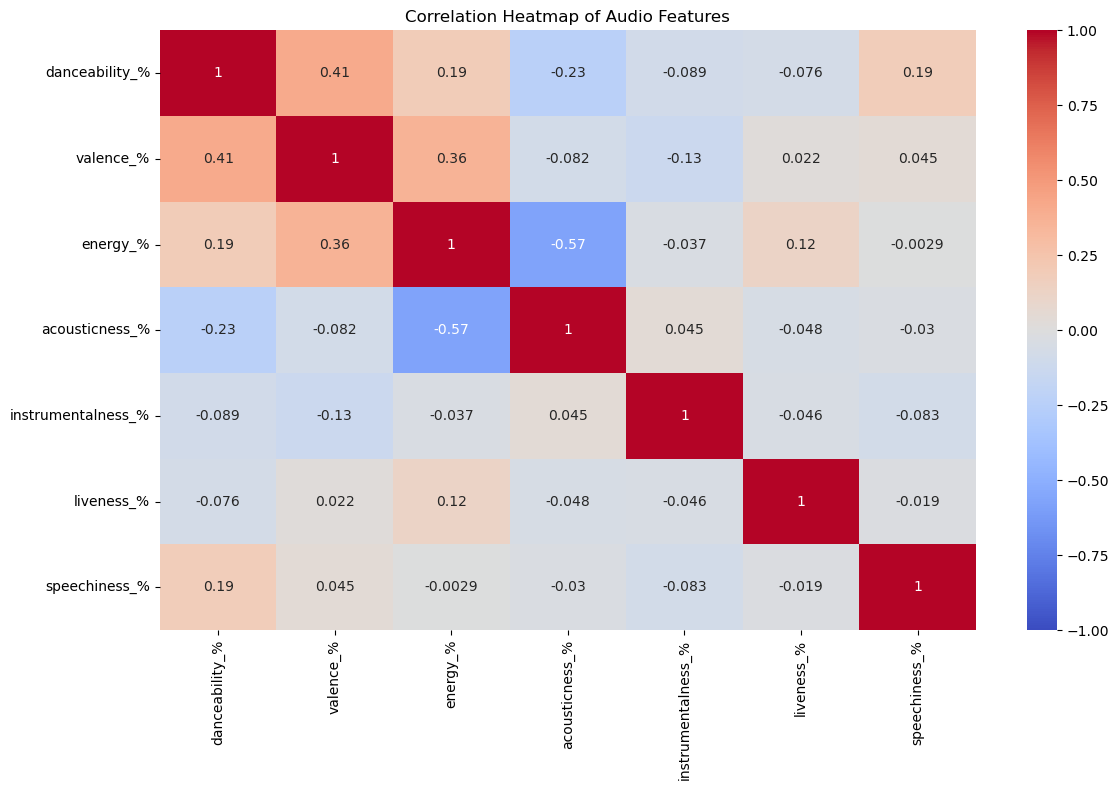

In [50]:
plt.figure(figsize = (12, 8))
corr = df[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

In [1]:
import seaborn as sns

<Axes: xlabel='total_bill', ylabel='Count'>

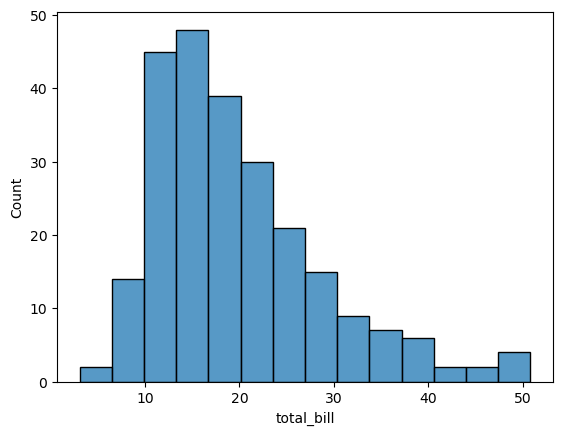

In [2]:
# Load dataset
tips = sns.load_dataset("tips")

# Create a histogram of the total bill amounts

sns.histplot(data=tips, x="total_bill")

In [4]:
excercise = sns.load_dataset('exercise')

excercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


<Axes: xlabel='total_bill', ylabel='tip'>

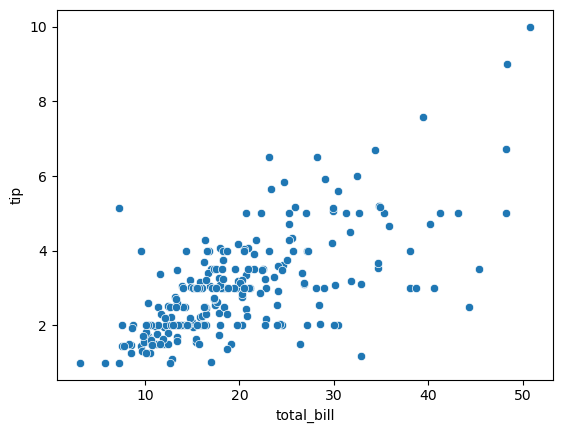

In [5]:
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x="total_bill", y="tip", data=tips)

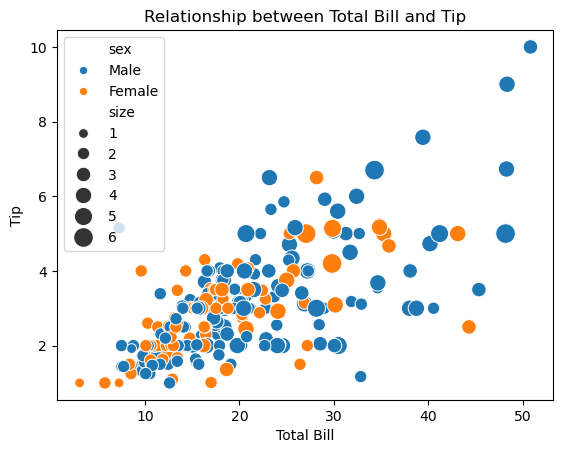

In [7]:
# 색조` 및 `크기` 매개변수를 사용자 지정

import matplotlib.pyplot as plt




tips = sns.load_dataset("tips")




# customize the scatter plot

sns.scatterplot(x="total_bill", y="tip", hue="sex", size="size", sizes=(50, 200), data=tips)




# add labels and title

plt.xlabel("Total Bill")

plt.ylabel("Tip")

plt.title("Relationship between Total Bill and Tip")



# display the plot

plt.show()


#### Seaborn 라인 플롯
##### -시간 경과에 따른 데이터 추세나 다른 연속 변수를 시각화하는 데 사용
##### -Seaborn에서 라인 플롯은 함수를 사용하여 만들 수 있습니다 lineplot()

<Axes: xlabel='timepoint', ylabel='signal'>

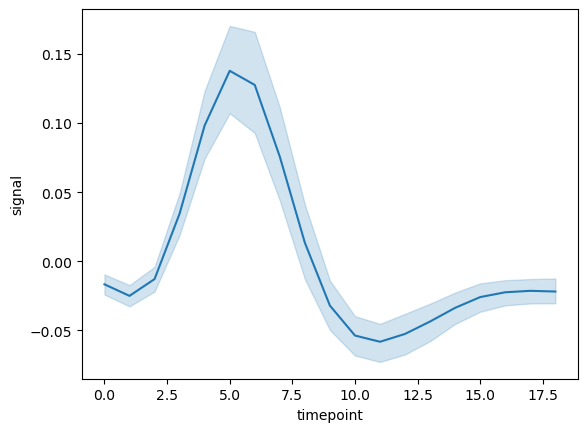

In [8]:
fmri = sns.load_dataset("fmri")

sns.lineplot(x="timepoint", y="signal", data=fmri)

<Axes: xlabel='timepoint', ylabel='signal'>

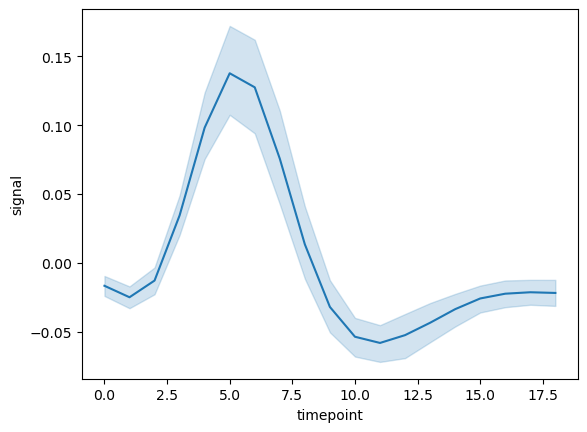

In [9]:
sns.lineplot(x="timepoint", y="signal", data=fmri)

##### 사용자지정으로 행,열이름 변경

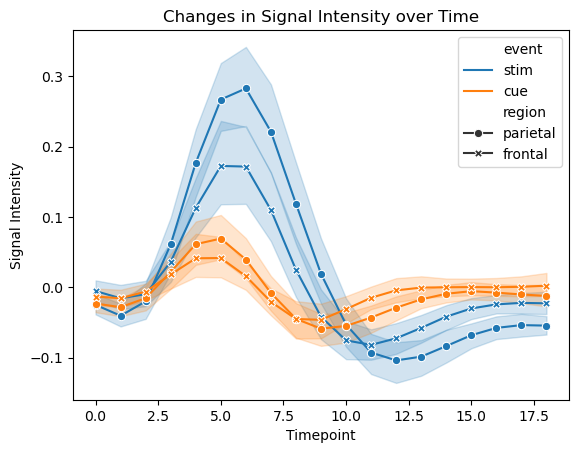

In [10]:
# customize the line plot
sns.lineplot(x="timepoint", y="signal", hue="event", style="region", markers=True, dashes=False, data=fmri)

# add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Signal Intensity")
plt.title("Changes in Signal Intensity over Time")

# display the plot
plt.show()

C:\Users\stakk\AppData\Local\Temp\ipykernel_13288\3999773892.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="class", y="fare", hue="sex", ci=None, palette="muted", data=titanic)


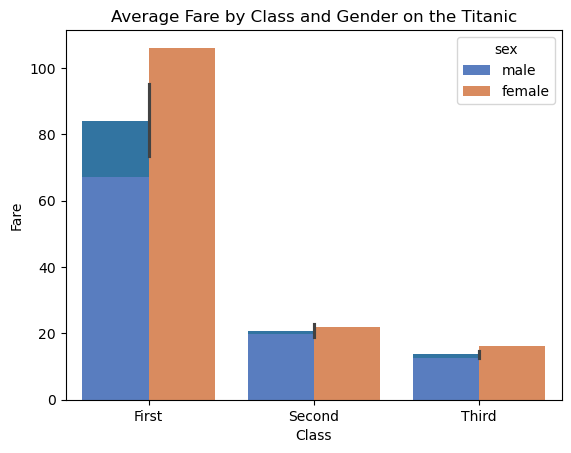

In [11]:
# bar plot
titanic = sns.load_dataset("titanic")
sns.barplot(x="class", y="fare", data=titanic)

import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

# customize the bar plot
sns.barplot(x="class", y="fare", hue="sex", ci=None, palette="muted", data=titanic)

# add labels and title
plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Average Fare by Class and Gender on the Titanic")

# display the plot

plt.show()

##### 히스토그램 사용자 정의



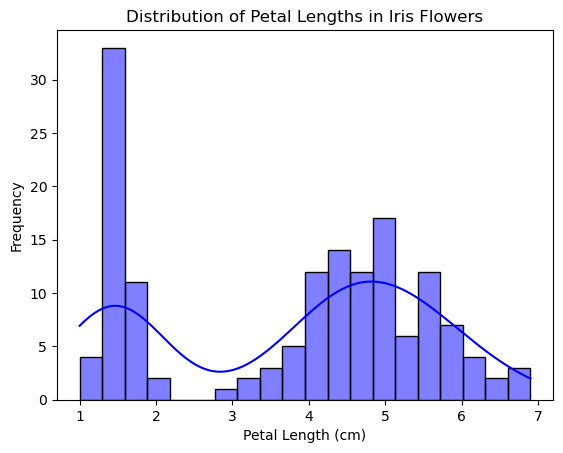

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

# customize the histogram
sns.histplot(data=iris, x="petal_length", bins=20, kde=True, color="blue")


# add labels and title
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of Petal Lengths in Iris Flowers")


# display the plot
plt.show()

##### Seaborn 밀도 플롯
- 부드러운 곡선을 사용하여 데이터 밀도를 추정
- kdeplot() 

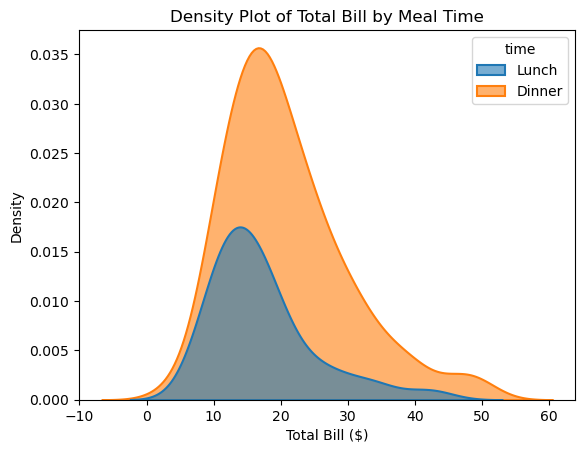

In [17]:
# Create a density plot of the "total_bill" column from the "tips" dataset
# We use the "hue" parameter to differentiate between "lunch" and "dinner" meal times
# We use the "fill" parameter to fill the area under the curve
# We adjust the "alpha" and "linewidth" parameters to make the plot more visually appealing

sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True, alpha=0.6, linewidth=1.5)

# Add a title and labels to the plot using Matplotlib

plt.title("Density Plot of Total Bill by Meal Time")
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")

plt.show()

##### 상자 그림
- 일반적으로 여러 범주에 걸쳐 하나 이상의 변수의 분포를 비교하는 데 사용

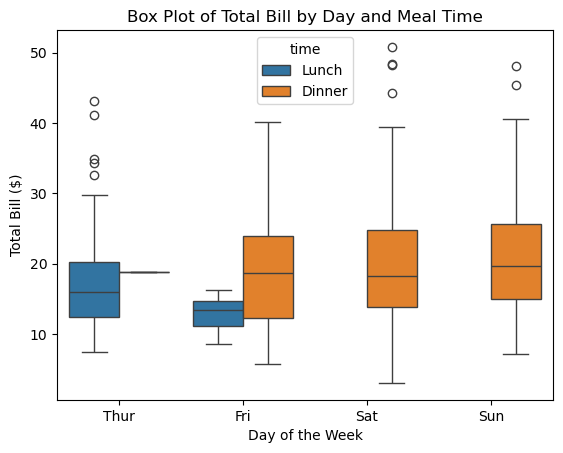

In [ ]:
# customize the color scheme using the "palette" parameter
# adjust the linewidth and fliersize parameters to make the plot more visually appealing
sns.boxplot(x="day", y="total_bill", hue="time",data=tips)
plt.title("Box Plot of Total Bill by Day and Meal Time")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")

# display the plot
plt.show()

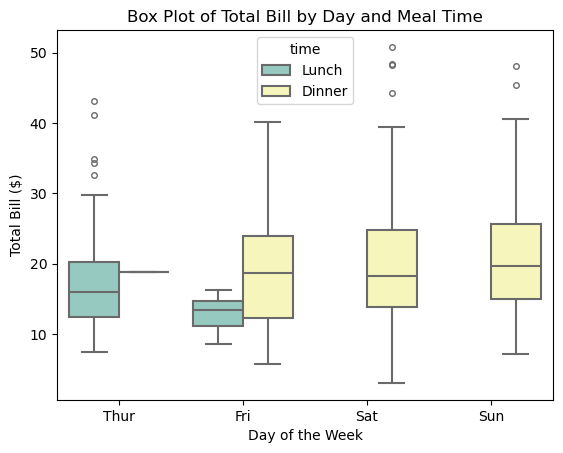

In [24]:
tips = sns.load_dataset("tips")
# load the iris dataset from Seaborn

# create a box plot of total bill by day and meal time, using the "hue" parameter to differentiate between lunch and dinner
# customize the color scheme using the "palette" parameter
# adjust the linewidth and fliersize parameters to make the plot more visually appealing
sns.boxplot(x="day", y="total_bill", hue="time", data=tips, palette="Set3", linewidth=1.5, fliersize=4)

# add a title, xlabel, and ylabel to the plot using Matplotlib functions
plt.title("Box Plot of Total Bill by Day and Meal Time")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")

# display the plot
plt.show()

<Axes: xlabel='species', ylabel='petal_length'>

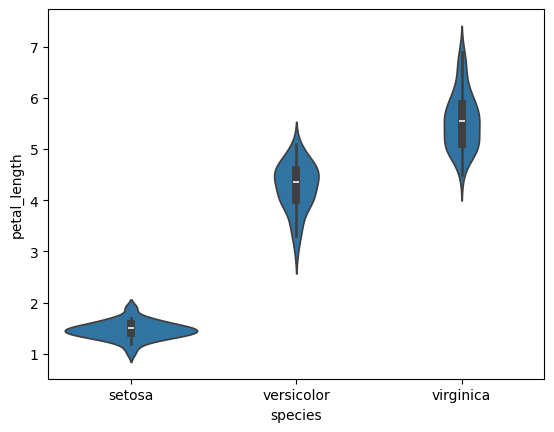

In [25]:
sns.violinplot(x="species", y="petal_length", data=iris)